# antBot Highway World Dataset Creation
Including image extraction, converting colour space, downsampling, saving as `PyTorch Tensor`.

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as P
import seaborn as sns
import cv2
from pyRC.analyse.perfectMemory import *

# Plotting settings
sns.set_context("notebook", font_scale = 1.5)
sns.set_style("dark")
sns.set_palette("deep", 12)
from ipywidgets import interact, interactive, fixed, interact_manual
cmap='Greys_r'

In [2]:
# (h,w) pairs;
HW = [[75,360], [50,180], [25,90]]

In [2]:
# Image Operations
Images = np.load('../data/2000-10/mountains.npy')
print(Images.shape)

(200, 720, 150, 3)


## Inspect Images Captured in the World

In [3]:
# %matplotlib widget
@interact(i=(0,len(Images)-1))
def plot(i=0):
    fig, ax = P.subplots(figsize=(16,9))
    ax.imshow(np.moveaxis(Images[i],0,1))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(f'Place {i}')

interactive(children=(IntSlider(value=0, description='i', max=199), Output()), _dom_classes=('widget-interact'…

### Example Image

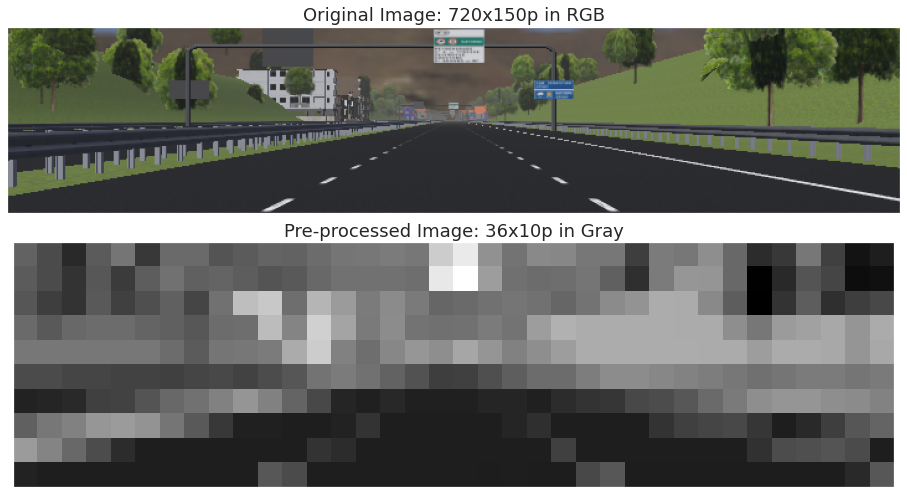

In [8]:
Img = [Images[12], IMAGEOP((Images[12]),*[10,36])]
Str = ['Original Image: 720x150p in RGB', 'Pre-processed Image: 36x10p in Gray']
fig, axs = P.subplots(2,1,figsize=(16,9))
for i,ax in enumerate(axs):
    ax.imshow(np.moveaxis(Img[i],0,1), cmap=cmap)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(Str[i])
fig.subplots_adjust(wspace=0.02, hspace=0)
P.savefig('./figs/mountains-original-processed.pdf', dpi=900, bbox_inches = 'tight', pad_inches = 0.01)

### IDF and CORCOEF as Heatmap for the Whole Dataset

In [6]:
imgIDF     = getAllIDF(Images, *[10,36])
imgCORCOEF = getAllCORCOEF(Images, *[10,36])

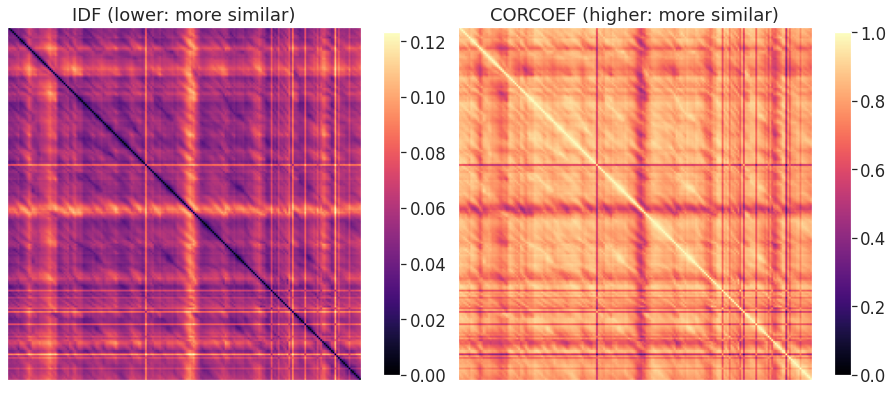

In [7]:
Img = [imgIDF, imgCORCOEF]
Str = ['IDF (lower: more similar)', 'CORCOEF (higher: more similar)']
p   = [None, None]
fig, axs = P.subplots(1,2,figsize=(16,9))
for i,ax in enumerate(axs):
    p[i] = ax.imshow(Img[i], cmap='magma', vmin=0)
    fig.colorbar(p[i], ax = ax, shrink=0.7)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(Str[i])
fig.subplots_adjust(wspace=0.02, hspace=0.01)
P.savefig('./figs/mountains-IDF-CORCOEF.pdf', dpi=900, bbox_inches = 'tight', pad_inches = 0.01)